In [355]:
# Name - Mahaveer Rulaniya
# Team - Vee.ai
# email - mahaveer.iitkgp@gmail.com

## Importing Libraries and Dataset

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [297]:
df= pd.read_csv('train.csv')

In [298]:
df.head()

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,59276,49418.0,27015.0,54748.0,NaN,78.0,78.0,0.0,1.0,29.0,1.0,0.0,allow
1,18986,58120.0,25174.0,NaN,0.0,66.0,66.0,0.0,NaN,0.0,1.0,0.0,deny
2,11131,46751.0,53.0,46751.0,53.0,220.0,90.0,130.0,2.0,30.0,NaN,1.0,allow
3,57352,52596.0,NaN,0.0,0.0,66.0,66.0,0.0,1.0,NaN,1.0,0.0,drop
4,17229,50584.0,6881.0,29773.0,NaN,502.0,150.0,352.0,2.0,1200.0,NaN,1.0,allow


In [299]:
ids = df['ID']

In [300]:
df= df.drop(['ID'],axis = 1)

In [301]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,49418.0,27015.0,54748.0,NaN,78.0,78.0,0.0,1.0,29.0,1.0,0.0,allow
1,58120.0,25174.0,NaN,0.0,66.0,66.0,0.0,NaN,0.0,1.0,0.0,deny
2,46751.0,53.0,46751.0,53.0,220.0,90.0,130.0,2.0,30.0,NaN,1.0,allow
3,52596.0,NaN,0.0,0.0,66.0,66.0,0.0,1.0,NaN,1.0,0.0,drop
4,50584.0,6881.0,29773.0,NaN,502.0,150.0,352.0,2.0,1200.0,NaN,1.0,allow


## Exploartory Data Analysis

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45870 entries, 0 to 45869
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Source Port           36683 non-null  float64
 1   Destination Port      36693 non-null  float64
 2   NAT Source Port       36756 non-null  float64
 3   NAT Destination Port  36674 non-null  float64
 4   Bytes                 36607 non-null  float64
 5   Bytes Sent            36764 non-null  float64
 6   Bytes Received        36693 non-null  float64
 7   Packets               36818 non-null  float64
 8   Elapsed Time (sec)    36584 non-null  float64
 9   pkts_sent             36667 non-null  float64
 10  pkts_received         36711 non-null  float64
 11  Action                45870 non-null  object 
dtypes: float64(11), object(1)
memory usage: 4.2+ MB


In [303]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,36683.000000,36693.000000,36756.000000,36674.000000,3.660700e+04,3.676400e+04,3.669300e+04,3.681800e+04,36584.000000,36667.000000,36711.000000
mean,49329.346318,10624.590058,19196.912205,2671.815428,1.148907e+05,1.228142e+04,8.011654e+04,1.236311e+02,66.069347,54.090436,65.390837
std,15303.525501,18537.440516,21919.020121,9788.359899,7.073021e+06,1.285235e+06,2.680172e+06,6.610959e+03,308.272172,4266.688906,2511.329970
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49160.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53766.000000,445.000000,8692.500000,53.000000,1.680000e+02,9.050000e+01,7.400000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58611.500000,15000.000000,38106.250000,443.000000,7.490000e+02,2.040000e+02,4.440000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65534.000000,1.269359e+09,2.134436e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [304]:
df.isnull().sum()/45870

Source Port             0.200283
Destination Port        0.200065
NAT Source Port         0.198692
NAT Destination Port    0.200480
Bytes                   0.201940
Bytes Sent              0.198518
Bytes Received          0.200065
Packets                 0.197340
Elapsed Time (sec)      0.202442
pkts_sent               0.200632
pkts_received           0.199673
Action                  0.000000
dtype: float64

In [305]:
df.Action.unique()

array(['allow', 'deny', 'drop', 'reset-both'], dtype=object)

In [306]:
df['Action']= df['Action'].replace({'allow':0,'deny':1,'drop':2,'reset-both':3}).astype(int)

In [307]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,49418.0,27015.0,54748.0,NaN,78.0,78.0,0.0,1.0,29.0,1.0,0.0,0
1,58120.0,25174.0,NaN,0.0,66.0,66.0,0.0,NaN,0.0,1.0,0.0,1
2,46751.0,53.0,46751.0,53.0,220.0,90.0,130.0,2.0,30.0,NaN,1.0,0
3,52596.0,NaN,0.0,0.0,66.0,66.0,0.0,1.0,NaN,1.0,0.0,2
4,50584.0,6881.0,29773.0,NaN,502.0,150.0,352.0,2.0,1200.0,NaN,1.0,0


In [308]:
data = df

In [309]:
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,49418.0,27015.0,54748.0,NaN,78.0,78.0,0.0,1.0,29.0,1.0,0.0,0
1,58120.0,25174.0,NaN,0.0,66.0,66.0,0.0,NaN,0.0,1.0,0.0,1
2,46751.0,53.0,46751.0,53.0,220.0,90.0,130.0,2.0,30.0,NaN,1.0,0
3,52596.0,NaN,0.0,0.0,66.0,66.0,0.0,1.0,NaN,1.0,0.0,2
4,50584.0,6881.0,29773.0,NaN,502.0,150.0,352.0,2.0,1200.0,NaN,1.0,0


In [310]:
data.isnull().sum()/45870

Source Port             0.200283
Destination Port        0.200065
NAT Source Port         0.198692
NAT Destination Port    0.200480
Bytes                   0.201940
Bytes Sent              0.198518
Bytes Received          0.200065
Packets                 0.197340
Elapsed Time (sec)      0.202442
pkts_sent               0.200632
pkts_received           0.199673
Action                  0.000000
dtype: float64

<AxesSubplot:xlabel='Source Port', ylabel='Count'>

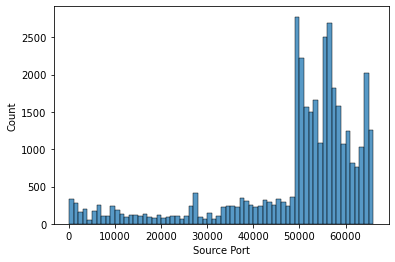

In [311]:
sns.histplot(data['Source Port'], binwidth=1000)

## Missing Values Treatment

In [312]:
data['Source Port']= data['Source Port'].fillna(data['Source Port'].median())

In [313]:
data['Destination Port']= data['Destination Port'].fillna(data['Destination Port'].median())
data['NAT Source Port']= data['NAT Source Port'].fillna(data['NAT Source Port'].median())
data['NAT Destination Port']= data['NAT Destination Port'].fillna(data['NAT Destination Port'].median())
data['Bytes']= data['Bytes'].fillna(data['Bytes'].median())
data['Bytes Sent']= data['Bytes Sent'].fillna(data['Bytes Sent'].median())
data['Bytes Received']= data['Bytes Received'].fillna(data['Bytes Received'].median())
data['Packets']= data['Packets'].fillna(data['Packets'].mode()[0])
data['Elapsed Time (sec)']= data['Elapsed Time (sec)'].fillna(data['Elapsed Time (sec)'].median())
data['pkts_sent']= data['pkts_sent'].fillna(data['pkts_sent'].mode()[0])
data['pkts_received']= data['pkts_received'].fillna(data['pkts_received'].mode()[0])

In [314]:
data.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received',
       'Action'],
      dtype='object')

In [315]:
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,49418.0,27015.0,54748.0,53.0,78.0,78.0,0.0,1.0,29.0,1.0,0.0,0
1,58120.0,25174.0,8692.5,0.0,66.0,66.0,0.0,1.0,0.0,1.0,0.0,1
2,46751.0,53.0,46751.0,53.0,220.0,90.0,130.0,2.0,30.0,1.0,1.0,0
3,52596.0,445.0,0.0,0.0,66.0,66.0,0.0,1.0,15.0,1.0,0.0,2
4,50584.0,6881.0,29773.0,53.0,502.0,150.0,352.0,2.0,1200.0,1.0,1.0,0


In [316]:
data.Action.mean()

0.6233049923697406

-------------------------------------------------

## Model testing

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [318]:
X = data.drop(['Action'],axis=1)

In [319]:
y= data['Action']

In [320]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [321]:
scaler=StandardScaler()

In [322]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [323]:
rm = RandomForestClassifier().fit(X_train, y_train)

In [324]:
rm.score(X_test,y_test)

0.9791594000697593

In [325]:
#accuracy_score()

In [326]:
rm_pred = rm.predict(X_test)

In [327]:
accuracy_score(y_test, rm_pred)

0.9791594000697593

-------------------------------------------

## Model Building on Test Dataset

In [337]:
tdf = pd.read_csv('test_e.csv')

In [338]:
tdf.head(-5)

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,23127,50142.0,445.0,0.0,0.0,NaN,70.0,0.0,1.0,0.0,1.0,NaN
1,61535,49496.0,53.0,NaN,53.0,194.0,NaN,92.0,2.0,30.0,1.0,1.0
2,31457,49209.0,53.0,27106.0,NaN,199.0,102.0,NaN,NaN,31.0,NaN,1.0
3,49294,49225.0,53.0,NaN,53.0,295.0,101.0,194.0,NaN,48.0,2.0,2.0
4,8826,NaN,NaN,0.0,NaN,70.0,70.0,0.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19652,60833,53462.0,NaN,47212.0,NaN,6384.0,1091.0,5293.0,18.0,30.0,10.0,8.0
19653,38761,57800.0,NaN,NaN,0.0,66.0,66.0,0.0,1.0,0.0,1.0,0.0
19654,3147,65070.0,53.0,45301.0,53.0,821.0,102.0,719.0,2.0,30.0,1.0,1.0
19655,55527,49623.0,53.0,NaN,53.0,790.0,110.0,NaN,2.0,29.0,NaN,1.0


In [339]:
tids = tdf['ID']

In [340]:
tdf= tdf.drop(['ID'],axis = 1)

In [341]:
tdf.isnull().sum()

Source Port             3969
Destination Port        3979
NAT Source Port         4067
NAT Destination Port    3942
Bytes                   3877
Bytes Sent              3778
Bytes Received          3929
Packets                 3926
Elapsed Time (sec)      3959
pkts_sent               3954
pkts_received           3949
dtype: int64

In [342]:
data1 = tdf

In [343]:
data1.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,50142.0,445.0,0.0,0.0,NaN,70.0,0.0,1.0,0.0,1.0,NaN
1,49496.0,53.0,NaN,53.0,194.0,NaN,92.0,2.0,30.0,1.0,1.0
2,49209.0,53.0,27106.0,NaN,199.0,102.0,NaN,NaN,31.0,NaN,1.0
3,49225.0,53.0,NaN,53.0,295.0,101.0,194.0,NaN,48.0,2.0,2.0
4,NaN,NaN,0.0,NaN,70.0,70.0,0.0,1.0,0.0,NaN,NaN


In [344]:
data1['Source Port']= data1['Source Port'].fillna(data1['Source Port'].median())
data1['Destination Port']= data1['Destination Port'].fillna(data1['Destination Port'].median())
data1['NAT Source Port']= data1['NAT Source Port'].fillna(data1['NAT Source Port'].median())
data1['NAT Destination Port']= data1['NAT Destination Port'].fillna(data1['NAT Destination Port'].median())
data1['Bytes']= data1['Bytes'].fillna(data1['Bytes'].median())
data1['Bytes Sent']= data1['Bytes Sent'].fillna(data1['Bytes Sent'].median())
data1['Bytes Received']= data1['Bytes Received'].fillna(data1['Bytes Received'].median())
data1['Packets']= data1['Packets'].fillna(data1['Packets'].mode()[0])
data1['Elapsed Time (sec)']= data1['Elapsed Time (sec)'].fillna(data1['Elapsed Time (sec)'].median())
data1['pkts_sent']= data1['pkts_sent'].fillna(data1['pkts_sent'].mode()[0])
data1['pkts_received']= data1['pkts_received'].fillna(data1['pkts_received'].mode()[0])

In [345]:
X_train =  data.drop(['Action'],axis=1)
X_test = data1
y_train = data['Action']

In [346]:
rm = RandomForestClassifier().fit(X_train, y_train)

In [347]:
rm_pred = rm.predict(X_test)

In [348]:
rm_pred

array([2, 0, 0, ..., 0, 0, 1])

In [349]:
final = pd.DataFrame({'ID':tids, 'Action':rm_pred})

In [350]:
final.head()

,ID,Action
0,23127,2
1,61535,0
2,31457,0
3,49294,0
4,8826,2


In [351]:
final['Action']= final['Action'].replace({0:'allow',1:'deny',2:'drop',3:'reset-both'})

In [352]:
final.head()

,ID,Action
0,23127,drop
1,61535,allow
2,31457,allow
3,49294,allow
4,8826,drop


In [353]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      19662 non-null  int64 
 1   Action  19662 non-null  object
dtypes: int64(1), object(1)
memory usage: 307.3+ KB


In [354]:
final.to_csv('eigmaf.csv', index= False)